In [737]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading Dataset 

In [738]:
df = pd.read_csv("telecom_churn.csv")
df.head()

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0           128                1         1        2.7              1   
1      0           107                1         1        3.7              1   
2      0           137                1         0        0.0              0   
3      0            84                0         0        0.0              2   
4      0            75                0         0        0.0              3   

   DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0    265.1       110           89.0        9.87      10.0  
1    161.6       123           82.0        9.78      13.7  
2    243.4       114           52.0        6.06      12.2  
3    299.4        71           57.0        3.10       6.6  
4    166.7       113           41.0        7.42      10.1

## Data Preprocessing

In [739]:
df.shape

(3333, 11)

In [740]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [741]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [742]:
df.describe()

Churn  AccountWeeks  ContractRenewal     DataPlan    DataUsage  \
count  3333.000000   3333.000000      3333.000000  3333.000000  3333.000000   
mean      0.144914    101.064806         0.903090     0.276628     0.816475   
std       0.352067     39.822106         0.295879     0.447398     1.272668   
min       0.000000      1.000000         0.000000     0.000000     0.000000   
25%       0.000000     74.000000         1.000000     0.000000     0.000000   
50%       0.000000    101.000000         1.000000     0.000000     0.000000   
75%       0.000000    127.000000         1.000000     1.000000     1.780000   
max       1.000000    243.000000         1.000000     1.000000     5.400000   

       CustServCalls      DayMins     DayCalls  MonthlyCharge   OverageFee  \
count    3333.000000  3333.000000  3333.000000    3333.000000  3333.000000   
mean        1.562856   179.775098   100.435644      56.305161    10.051488   
std         1.315491    54.467389    20.069084      16.426032     2.535712   
min         0.000000     0.000000     0.000000      14.000000     0.000000   
25%         1.000000   143.700000    87.000000      45.000000     8.330000   
50%         1.000000   179.400000   101.000000      53.500000    10.070000   
75%         2.000000   216.400000   114.000000      66.200000    11.770000   
max         9.000000   350.800000   165.000000     111.300000    18.190000   

          RoamMins  
count  3333.000000  
mean     10.237294  
std       2.791840  
min       0.000000  
25%       8.500000  
50%      10.300000  
75%      12.100000  
max      20.000000

In [743]:
# Checking for NaNs

df[df['Churn'].isna()]

Empty DataFrame
Columns: [Churn, AccountWeeks, ContractRenewal, DataPlan, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee, RoamMins]
Index: []

In [744]:
# Checking for NaNs

df[df['AccountWeeks'].isna()]

Empty DataFrame
Columns: [Churn, AccountWeeks, ContractRenewal, DataPlan, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee, RoamMins]
Index: []

In [745]:
# Checking for NaNs

df[df['ContractRenewal'].isna()]

Empty DataFrame
Columns: [Churn, AccountWeeks, ContractRenewal, DataPlan, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee, RoamMins]
Index: []

In [746]:
# Checking for NaNs

df[df['DataPlan'].isna()]

Empty DataFrame
Columns: [Churn, AccountWeeks, ContractRenewal, DataPlan, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee, RoamMins]
Index: []

In [747]:
# Checking for NaNs

df[df['DataUsage'].isna()]

Empty DataFrame
Columns: [Churn, AccountWeeks, ContractRenewal, DataPlan, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee, RoamMins]
Index: []

In [748]:
# Checking for NaNs

df[df['CustServCalls'].isna()]

Empty DataFrame
Columns: [Churn, AccountWeeks, ContractRenewal, DataPlan, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee, RoamMins]
Index: []

In [749]:
# Checking for NaNs

df[df['DayMins'].isna()]

Empty DataFrame
Columns: [Churn, AccountWeeks, ContractRenewal, DataPlan, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee, RoamMins]
Index: []

In [750]:
# Checking for NaNs

df[df['DayCalls'].isna()]

Empty DataFrame
Columns: [Churn, AccountWeeks, ContractRenewal, DataPlan, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee, RoamMins]
Index: []

In [751]:
# Checking for NaNs

df[df['MonthlyCharge'].isna()]

Empty DataFrame
Columns: [Churn, AccountWeeks, ContractRenewal, DataPlan, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee, RoamMins]
Index: []

In [752]:
# Checking for NaNs

df[df['OverageFee'].isna()]

Empty DataFrame
Columns: [Churn, AccountWeeks, ContractRenewal, DataPlan, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee, RoamMins]
Index: []

In [753]:
# Checking for NaNs

df[df['RoamMins'].isna()]

Empty DataFrame
Columns: [Churn, AccountWeeks, ContractRenewal, DataPlan, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee, RoamMins]
Index: []

In [754]:
# We have thus verified that there are no missing values in any of the columns

## Outlier Detection & Handling

In [755]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

<AxesSubplot:>

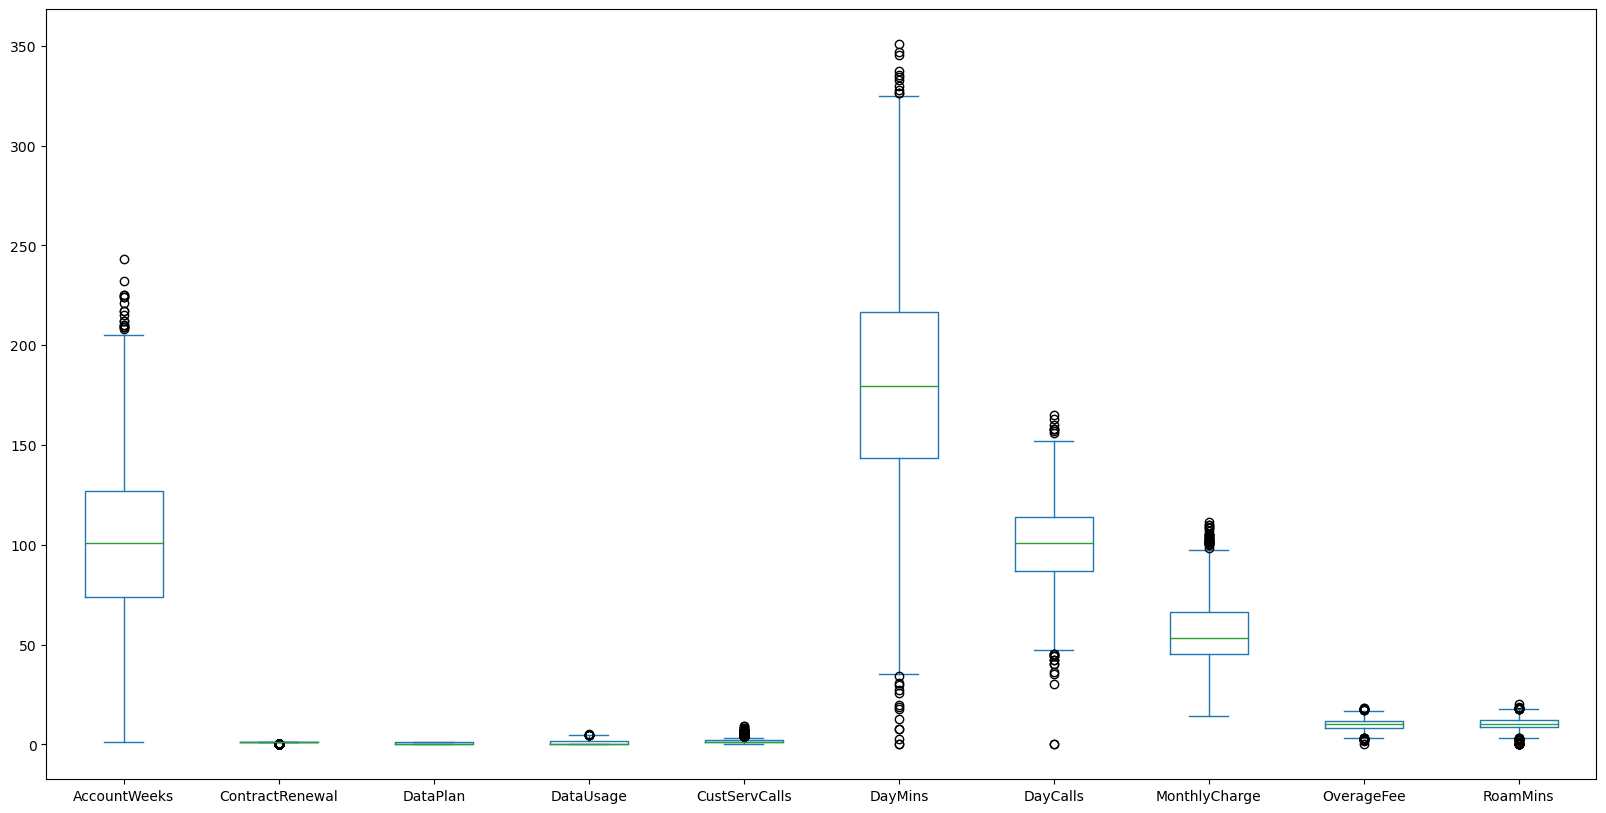

In [756]:
df[['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins']].plot.box(figsize = (20, 10))

In [757]:
df.describe()

Churn  AccountWeeks  ContractRenewal     DataPlan    DataUsage  \
count  3333.000000   3333.000000      3333.000000  3333.000000  3333.000000   
mean      0.144914    101.064806         0.903090     0.276628     0.816475   
std       0.352067     39.822106         0.295879     0.447398     1.272668   
min       0.000000      1.000000         0.000000     0.000000     0.000000   
25%       0.000000     74.000000         1.000000     0.000000     0.000000   
50%       0.000000    101.000000         1.000000     0.000000     0.000000   
75%       0.000000    127.000000         1.000000     1.000000     1.780000   
max       1.000000    243.000000         1.000000     1.000000     5.400000   

       CustServCalls      DayMins     DayCalls  MonthlyCharge   OverageFee  \
count    3333.000000  3333.000000  3333.000000    3333.000000  3333.000000   
mean        1.562856   179.775098   100.435644      56.305161    10.051488   
std         1.315491    54.467389    20.069084      16.426032     2.535712   
min         0.000000     0.000000     0.000000      14.000000     0.000000   
25%         1.000000   143.700000    87.000000      45.000000     8.330000   
50%         1.000000   179.400000   101.000000      53.500000    10.070000   
75%         2.000000   216.400000   114.000000      66.200000    11.770000   
max         9.000000   350.800000   165.000000     111.300000    18.190000   

          RoamMins  
count  3333.000000  
mean     10.237294  
std       2.791840  
min       0.000000  
25%       8.500000  
50%      10.300000  
75%      12.100000  
max      20.000000

### AccountWeeks

In [758]:
df['AccountWeeks'].mean()

101.06480648064806

In [759]:
df['AccountWeeks'].median()

101.0

In [760]:
min(df['AccountWeeks'])

1

In [761]:
max(df['AccountWeeks'])

243

In [762]:
# Fixing Lower and Upper limits for column values

def outlier_removal(df, AccountWeeks):
    upper_limit_AccountWeeks = df[AccountWeeks].mean() + 4 * df[AccountWeeks].std()
    lower_limit_AccountWeeks = df[AccountWeeks].mean() - 4 * df[AccountWeeks].std()
    return upper_limit_AccountWeeks, lower_limit_AccountWeeks

upper_limit_AccountWeeks, lower_limit_AccountWeeks = outlier_removal(df, "AccountWeeks")
print("Upper limit: ", upper_limit_AccountWeeks)
print("Lower Limit: ",lower_limit_AccountWeeks)

Upper limit:  260.3532301950305
Lower Limit:  -58.22361723373436


In [763]:
# Printing the outliers

df[(df['AccountWeeks'] < lower_limit_AccountWeeks) | (df['AccountWeeks'] > upper_limit_AccountWeeks)]

Empty DataFrame
Columns: [Churn, AccountWeeks, ContractRenewal, DataPlan, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee, RoamMins]
Index: []

In [764]:
# No outliers in AccountWeeks column

### ContractRenewal

In [765]:
df['ContractRenewal'].mean()

0.903090309030903

In [766]:
df['ContractRenewal'].median()

1.0

In [767]:
min(df['ContractRenewal'])

0

In [768]:
max(df['ContractRenewal'])

1

In [769]:
# Fixing Lower and Upper limits for column values

def outlier_removal(df, ContractRenewal):
    upper_limit_ContractRenewal = df[ContractRenewal].mean() + 4 * df[ContractRenewal].std()
    lower_limit_ContractRenewal = df[ContractRenewal].mean() - 4 * df[ContractRenewal].std()
    return upper_limit_ContractRenewal, lower_limit_ContractRenewal

upper_limit_ContractRenewal, lower_limit_ContractRenewal = outlier_removal(df, "ContractRenewal")
print("Upper limit: ", upper_limit_ContractRenewal)
print("Lower Limit: ",lower_limit_ContractRenewal)

Upper limit:  2.086606890968593
Lower Limit:  -0.28042627290678657


In [770]:
# Printing the outliers

df[(df['ContractRenewal'] < lower_limit_ContractRenewal) | (df['ContractRenewal'] > upper_limit_ContractRenewal)]

Empty DataFrame
Columns: [Churn, AccountWeeks, ContractRenewal, DataPlan, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee, RoamMins]
Index: []

In [771]:
# No outliers in ContractRenewal column

### DataPlan

In [772]:
df['DataPlan'].mean()

0.27662766276627665

In [773]:
df['DataPlan'].median()

0.0

In [774]:
min(df['DataPlan'])

0

In [775]:
max(df['DataPlan'])

1

In [776]:
# Fixing Lower and Upper limits for column values

def outlier_removal(df, DataPlan):
    upper_limit_DataPlan = df[DataPlan].mean() + 3 * df[DataPlan].std()
    lower_limit_DataPlan = df[DataPlan].mean() - 3 * df[DataPlan].std()
    return upper_limit_DataPlan, lower_limit_DataPlan

upper_limit_DataPlan, lower_limit_DataPlan = outlier_removal(df, "DataPlan")
print("Upper limit: ", upper_limit_DataPlan)
print("Lower Limit: ",lower_limit_DataPlan)

Upper limit:  1.6188212739065098
Lower Limit:  -1.0655659483739564


In [777]:
# Printing the outliers

df[(df['DataPlan'] < lower_limit_DataPlan) | (df['DataPlan'] > upper_limit_DataPlan)]

Empty DataFrame
Columns: [Churn, AccountWeeks, ContractRenewal, DataPlan, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee, RoamMins]
Index: []

In [778]:
# No outliers in DataPlan column

### DataUsage

In [779]:
df['DataUsage'].mean()

0.8164746474647478

In [780]:
df['DataUsage'].median()

0.0

In [781]:
min(df['DataUsage'])

0.0

In [782]:
max(df['DataUsage'])

5.4

In [783]:
# Fixing Lower and Upper limits for column values

def outlier_removal(df, DataUsage):
    upper_limit_DataUsage = df[DataUsage].mean() + 3 * df[DataUsage].std()
    lower_limit_DataUsage = df[DataUsage].mean() - 3 * df[DataUsage].std()
    return upper_limit_DataUsage, lower_limit_DataUsage

upper_limit_DataUsage, lower_limit_DataUsage = outlier_removal(df, "DataUsage")
print("Upper limit: ", upper_limit_DataUsage)
print("Lower Limit: ",lower_limit_DataUsage)

Upper limit:  4.6344787635393345
Lower Limit:  -3.0015294686098386


In [784]:
# Printing the outliers

df[(df['DataUsage'] < lower_limit_DataUsage) | (df['DataUsage'] > upper_limit_DataUsage)]

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
115       1            36                0         1       5.40   
469       0            41                1         1       4.64   
515       0           148                1         1       4.73   
2229      0            83                1         1       4.75   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
115               0    196.8        89          110.0       12.75      20.0  
469               2    194.4        63          101.4       12.75      17.2  
515               1     93.6       137           80.3        9.69      17.5  
2229              2    191.3        95          101.5       12.54      17.6

In [785]:
# Dropping the records with Outliers

df = df.drop(df[(df['DataUsage'] < lower_limit_DataUsage) | (df['DataUsage'] > upper_limit_DataUsage)].index)

In [786]:
df.shape # 4 records dropped

(3329, 11)

### CustServCalls

In [787]:
df['CustServCalls'].mean()

1.5632322018624212

In [788]:
df['CustServCalls'].median()

1.0

In [789]:
min(df['CustServCalls'])

0

In [790]:
max(df['CustServCalls'])

9

In [791]:
# Fixing Lower and Upper limits for column values

def outlier_removal(df, CustServCalls):
    upper_limit_CustServCalls = df[CustServCalls].mean() + 5 * df[CustServCalls].std()
    lower_limit_CustServCalls = df[CustServCalls].mean() - 5 * df[CustServCalls].std()
    return upper_limit_CustServCalls, lower_limit_CustServCalls

upper_limit_CustServCalls, lower_limit_CustServCalls = outlier_removal(df, "CustServCalls")
print("Upper limit: ", upper_limit_CustServCalls)
print("Lower Limit: ",lower_limit_CustServCalls)

Upper limit:  8.142845660305847
Lower Limit:  -5.016381256581004


In [792]:
# Printing the outliers

df[(df['CustServCalls'] < lower_limit_CustServCalls) | (df['CustServCalls'] > upper_limit_CustServCalls)]

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
542       1           152                0         1       3.83   
2380      1            53                1         0       0.00   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
542               9    237.5       120          100.3       12.67      14.2  
2380              9    228.6       117           51.0        6.64      10.1

In [793]:
# Dropping the records with Outliers

df = df.drop(df[(df['CustServCalls'] < lower_limit_CustServCalls) | (df['CustServCalls'] > upper_limit_CustServCalls)].index)

In [794]:
df.shape

(3327, 11)

### DayMins

In [795]:
df['DayMins'].mean()

179.75599639314717

In [796]:
df['DayMins'].median()

179.4

In [797]:
min(df['DayMins'])

0.0

In [798]:
max(df['DayMins'])

350.8

In [799]:
# Fixing Lower and Upper limits for column values

def outlier_removal(df, DayMins):
    upper_limit_DayMins = df[DayMins].mean() + 4 * df[DayMins].std()
    lower_limit_DayMins = df[DayMins].mean() - 4 * df[DayMins].std()
    return upper_limit_DayMins, lower_limit_DayMins

upper_limit_DayMins, lower_limit_DayMins = outlier_removal(df, "DayMins")
print("Upper limit: ", upper_limit_DayMins)
print("Lower Limit: ",lower_limit_DayMins)

Upper limit:  397.6699321688955
Lower Limit:  -38.15793938260117


In [800]:
# Printing the outliers

df[(df['DayMins'] < lower_limit_DayMins) | (df['DayMins'] > upper_limit_DayMins)]

Empty DataFrame
Columns: [Churn, AccountWeeks, ContractRenewal, DataPlan, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee, RoamMins]
Index: []

In [801]:
# No outliers in DayMins column

### DayCalls

In [802]:
df['DayCalls'].mean()

100.43011722272317

In [803]:
df['DayCalls'].median()

101.0

In [804]:
min(df['DayCalls'])

0

In [805]:
max(df['DayCalls'])

165

In [806]:
# Fixing Lower and Upper limits for column values

def outlier_removal(df, DayCalls):
    upper_limit_DayCalls = df[DayCalls].mean() + 4 * df[DayCalls].std()
    lower_limit_DayCalls = df[DayCalls].mean() - 4 * df[DayCalls].std()
    return upper_limit_DayCalls, lower_limit

upper_limit_DayCalls, lower_limit_DayCalls = outlier_removal(df, "DayCalls")
print("Upper limit: ", upper_limit_DayCalls)
print("Lower Limit: ",lower_limit_DayCalls)

Upper limit:  180.6723093131801
Lower Limit:  7.027065437127568


In [807]:
# Printing the outliers

df[(df['DayCalls'] < lower_limit_DayCalls) | (df['DayCalls'] > upper_limit_DayCalls)]

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
1345      1            98                1         0        0.0   
1397      0           101                1         0        0.3   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
1345              4      0.0         0           14.0        7.98       6.8  
1397              1      0.0         0           20.0        9.61       7.2

In [808]:
# Dropping the records with Outliers

df = df.drop(df[(df['DayCalls'] < lower_limit_DayCalls) | (df['DayCalls'] > upper_limit_DayCalls)].index)

In [809]:
df.shape

(3325, 11)

### MonthlyCharge

In [810]:
df['MonthlyCharge'].mean()

56.26664661654142

In [811]:
df['MonthlyCharge'].median()

53.5

In [812]:
min(df['MonthlyCharge'])

15.7

In [813]:
max(df['MonthlyCharge'])

111.3

In [814]:
# Fixing Lower and Upper limits for column values

def outlier_removal(df, MonthlyCharge):
    upper_limit_MonthlyCharge = df[MonthlyCharge].mean() + 3 * df[MonthlyCharge].std()
    lower_limit_MonthlyCharge = df[MonthlyCharge].mean() - 3 * df[MonthlyCharge].std()
    return upper_limit_MonthlyCharge, lower_limit_MonthlyCharge

upper_limit_MonthlyCharge, lower_limit_MonthlyCharge = outlier_removal(df, "MonthlyCharge")
print("Upper limit: ", upper_limit_MonthlyCharge)
print("Lower Limit: ", lower_limit_MonthlyCharge)

Upper limit:  105.2567330421312
Lower Limit:  7.276560190951642


In [815]:
# Printing the outliers

df[(df['MonthlyCharge'] < lower_limit_MonthlyCharge) | (df['MonthlyCharge'] > upper_limit_MonthlyCharge)]

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
575       0           114                1         1       3.83   
579       0            72                1         1       4.46   
670       0            32                1         1       4.40   
1355      0            50                1         1       3.67   
1821      0           123                1         1       4.16   
2122      0            69                1         1       4.43   
2793      0           107                1         1       3.89   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
575               1    309.9        90          108.3       10.02      14.2  
579               1    186.7       108          105.6       16.75      16.5  
670               1    266.7       109          110.0       11.62      16.3  
1355              3    302.7        93          108.7       12.03      13.6  
1821              1    270.4        99          108.6       12.26      15.4  
2122              0    268.8        78          111.3       12.33      16.4  
2793              2    283.4       104          106.9       11.21      14.4

In [816]:
# Dropping the records with Outliers

df = df.drop(df[(df['MonthlyCharge'] < lower_limit_MonthlyCharge) | (df['MonthlyCharge'] > upper_limit_MonthlyCharge)].index)

In [817]:
df.shape

(3318, 11)

### OverageFee

In [818]:
df['OverageFee'].mean()

10.045437010247111

In [819]:
df['OverageFee'].median()

10.065000000000001

In [820]:
min(df['OverageFee'])

0.0

In [821]:
max(df['OverageFee'])

18.19

In [822]:
# Fixing Lower and Upper limits for column values

def outlier_removal(df, OverageFee):
    upper_limit_OverageFee = df[OverageFee].mean() + 4 * df[OverageFee].std()
    lower_limit_OverageFee = df[OverageFee].mean() - 4 * df[OverageFee].std()
    return upper_limit_OverageFee, lower_limit_OverageFee

upper_limit_OverageFee, lower_limit_OverageFee = outlier_removal(df, "OverageFee")
print("Upper limit: ", upper_limit_OverageFee)
print("Lower Limit: ",lower_limit_OverageFee)

Upper limit:  20.185859138888937
Lower Limit:  -0.09498511839471568


In [823]:
# Printing the outliers

df[(df['OverageFee'] < lower_limit_OverageFee) | (df['OverageFee'] > upper_limit_OverageFee)]

Empty DataFrame
Columns: [Churn, AccountWeeks, ContractRenewal, DataPlan, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee, RoamMins]
Index: []

In [824]:
# No outliers in OverageFee column

### RoamMins

In [825]:
df['RoamMins'].mean()

10.218053044002414

In [826]:
df['RoamMins'].median()

10.3

In [827]:
min(df['RoamMins'])

0.0

In [828]:
max(df['RoamMins'])

18.9

In [829]:
# Fixing Lower and Upper limits for column values

def outlier_removal(df, RoamMins):
    upper_limit_RoamMins = df[RoamMins].mean() + 4 * df[RoamMins].std()
    lower_limit_RoamMins = df[RoamMins].mean() - 4 * df[RoamMins].std()
    return upper_limit_RoamMins, lower_limit_RoamMins

upper_limit_RoamMins, lower_limit_RoamMins = outlier_removal(df, "RoamMins")
print("Upper limit: ", upper_limit_RoamMins)
print("Lower Limit: ", lower_limit_RoamMins)

Upper limit:  21.30809178556261
Lower Limit:  -0.8719856975577844


In [830]:
# Printing the outliers

df[(df['RoamMins'] < lower_limit_RoamMins) | (df['RoamMins'] > upper_limit_RoamMins)]

Empty DataFrame
Columns: [Churn, AccountWeeks, ContractRenewal, DataPlan, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee, RoamMins]
Index: []

In [831]:
# No outliers in RoamMins column

## Data Visualisation

array([[<AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'AccountWeeks'}>,
        <AxesSubplot:title={'center':'ContractRenewal'}>],
       [<AxesSubplot:title={'center':'DataPlan'}>,
        <AxesSubplot:title={'center':'DataUsage'}>,
        <AxesSubplot:title={'center':'CustServCalls'}>],
       [<AxesSubplot:title={'center':'DayMins'}>,
        <AxesSubplot:title={'center':'DayCalls'}>,
        <AxesSubplot:title={'center':'MonthlyCharge'}>],
       [<AxesSubplot:title={'center':'OverageFee'}>,
        <AxesSubplot:title={'center':'RoamMins'}>, <AxesSubplot:>]],
      dtype=object)

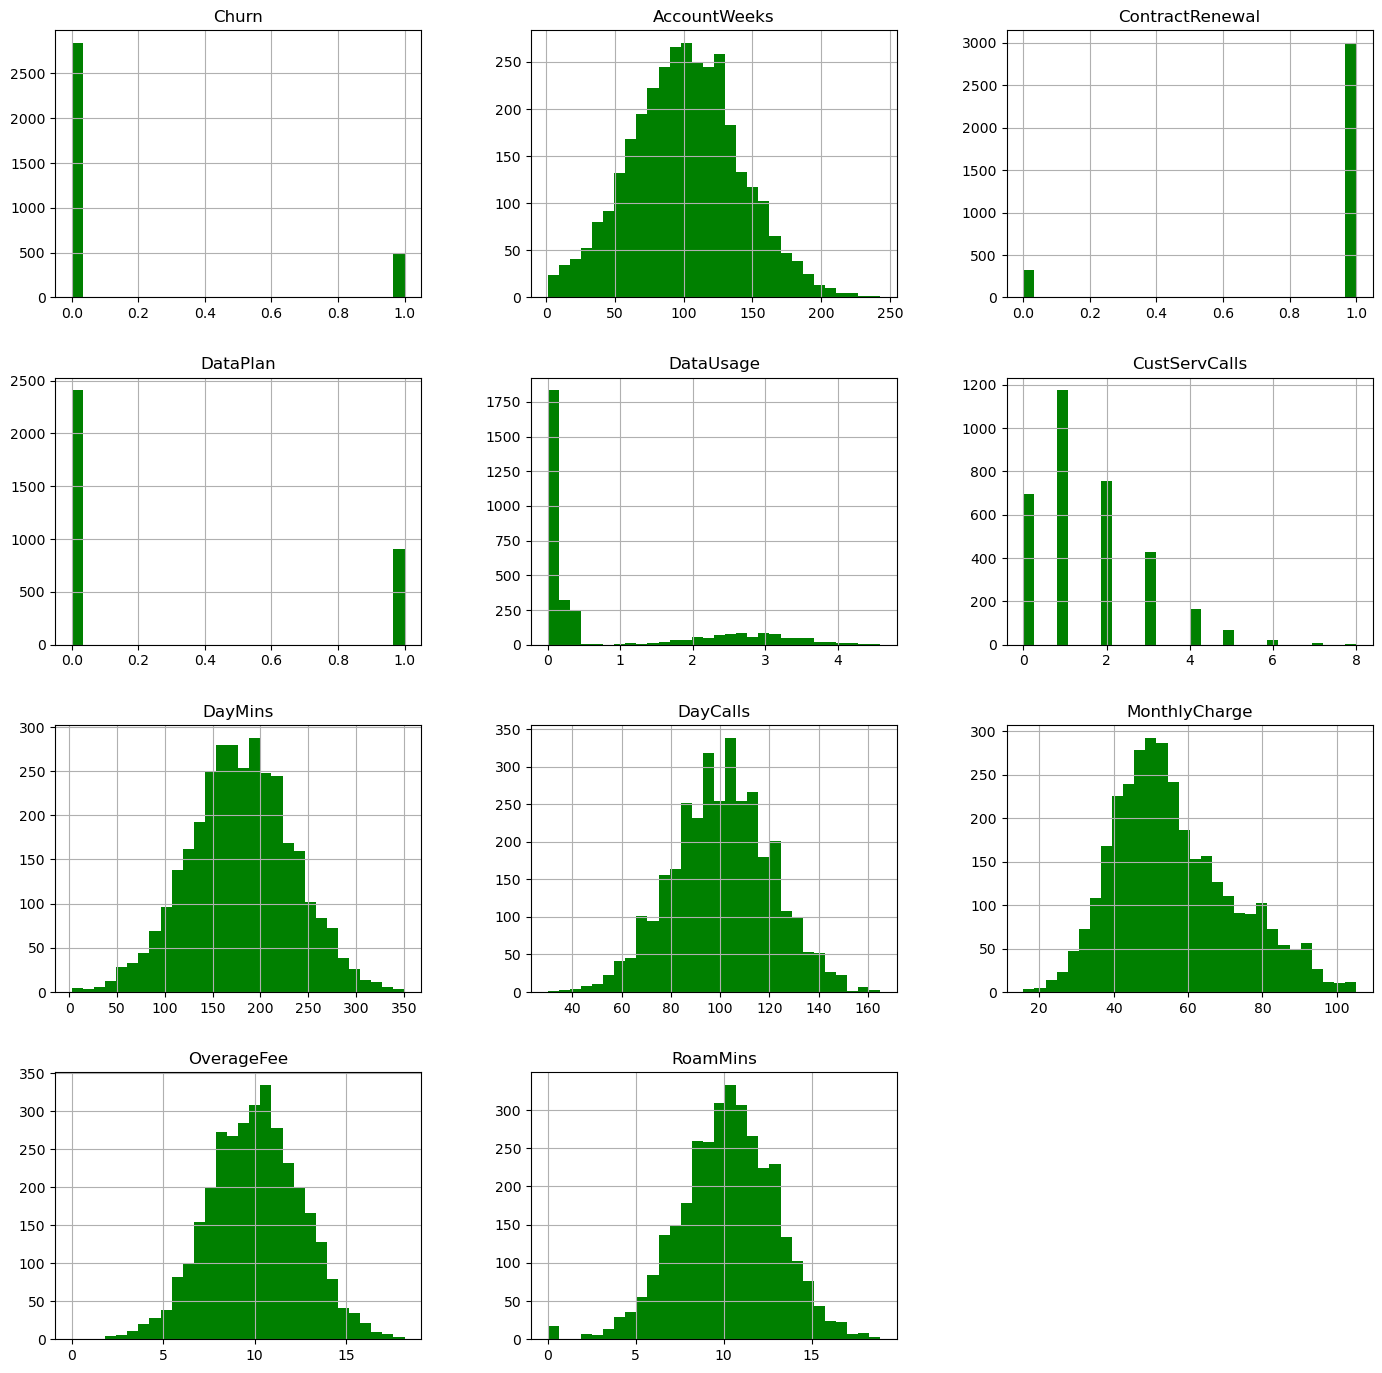

In [832]:
df.hist(figsize=(17,17), bins=30, color='g')

<AxesSubplot:title={'center':'Retained & Churned Customer Ratio'}, ylabel='Churn'>

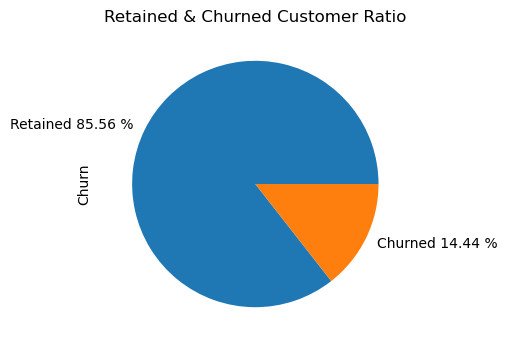

In [833]:
df["Churn"].value_counts().plot(kind="pie", title="Retained & Churned Customer Ratio",
                                labels = ["Retained {:.2f} %".format(len(df.loc[df.Churn==0])*100/len(df.Churn)),
                                          "Churned {:.2f} %".format(len(df.loc[df.Churn==1])*100/len(df.Churn))],
                                figsize=(4,4))

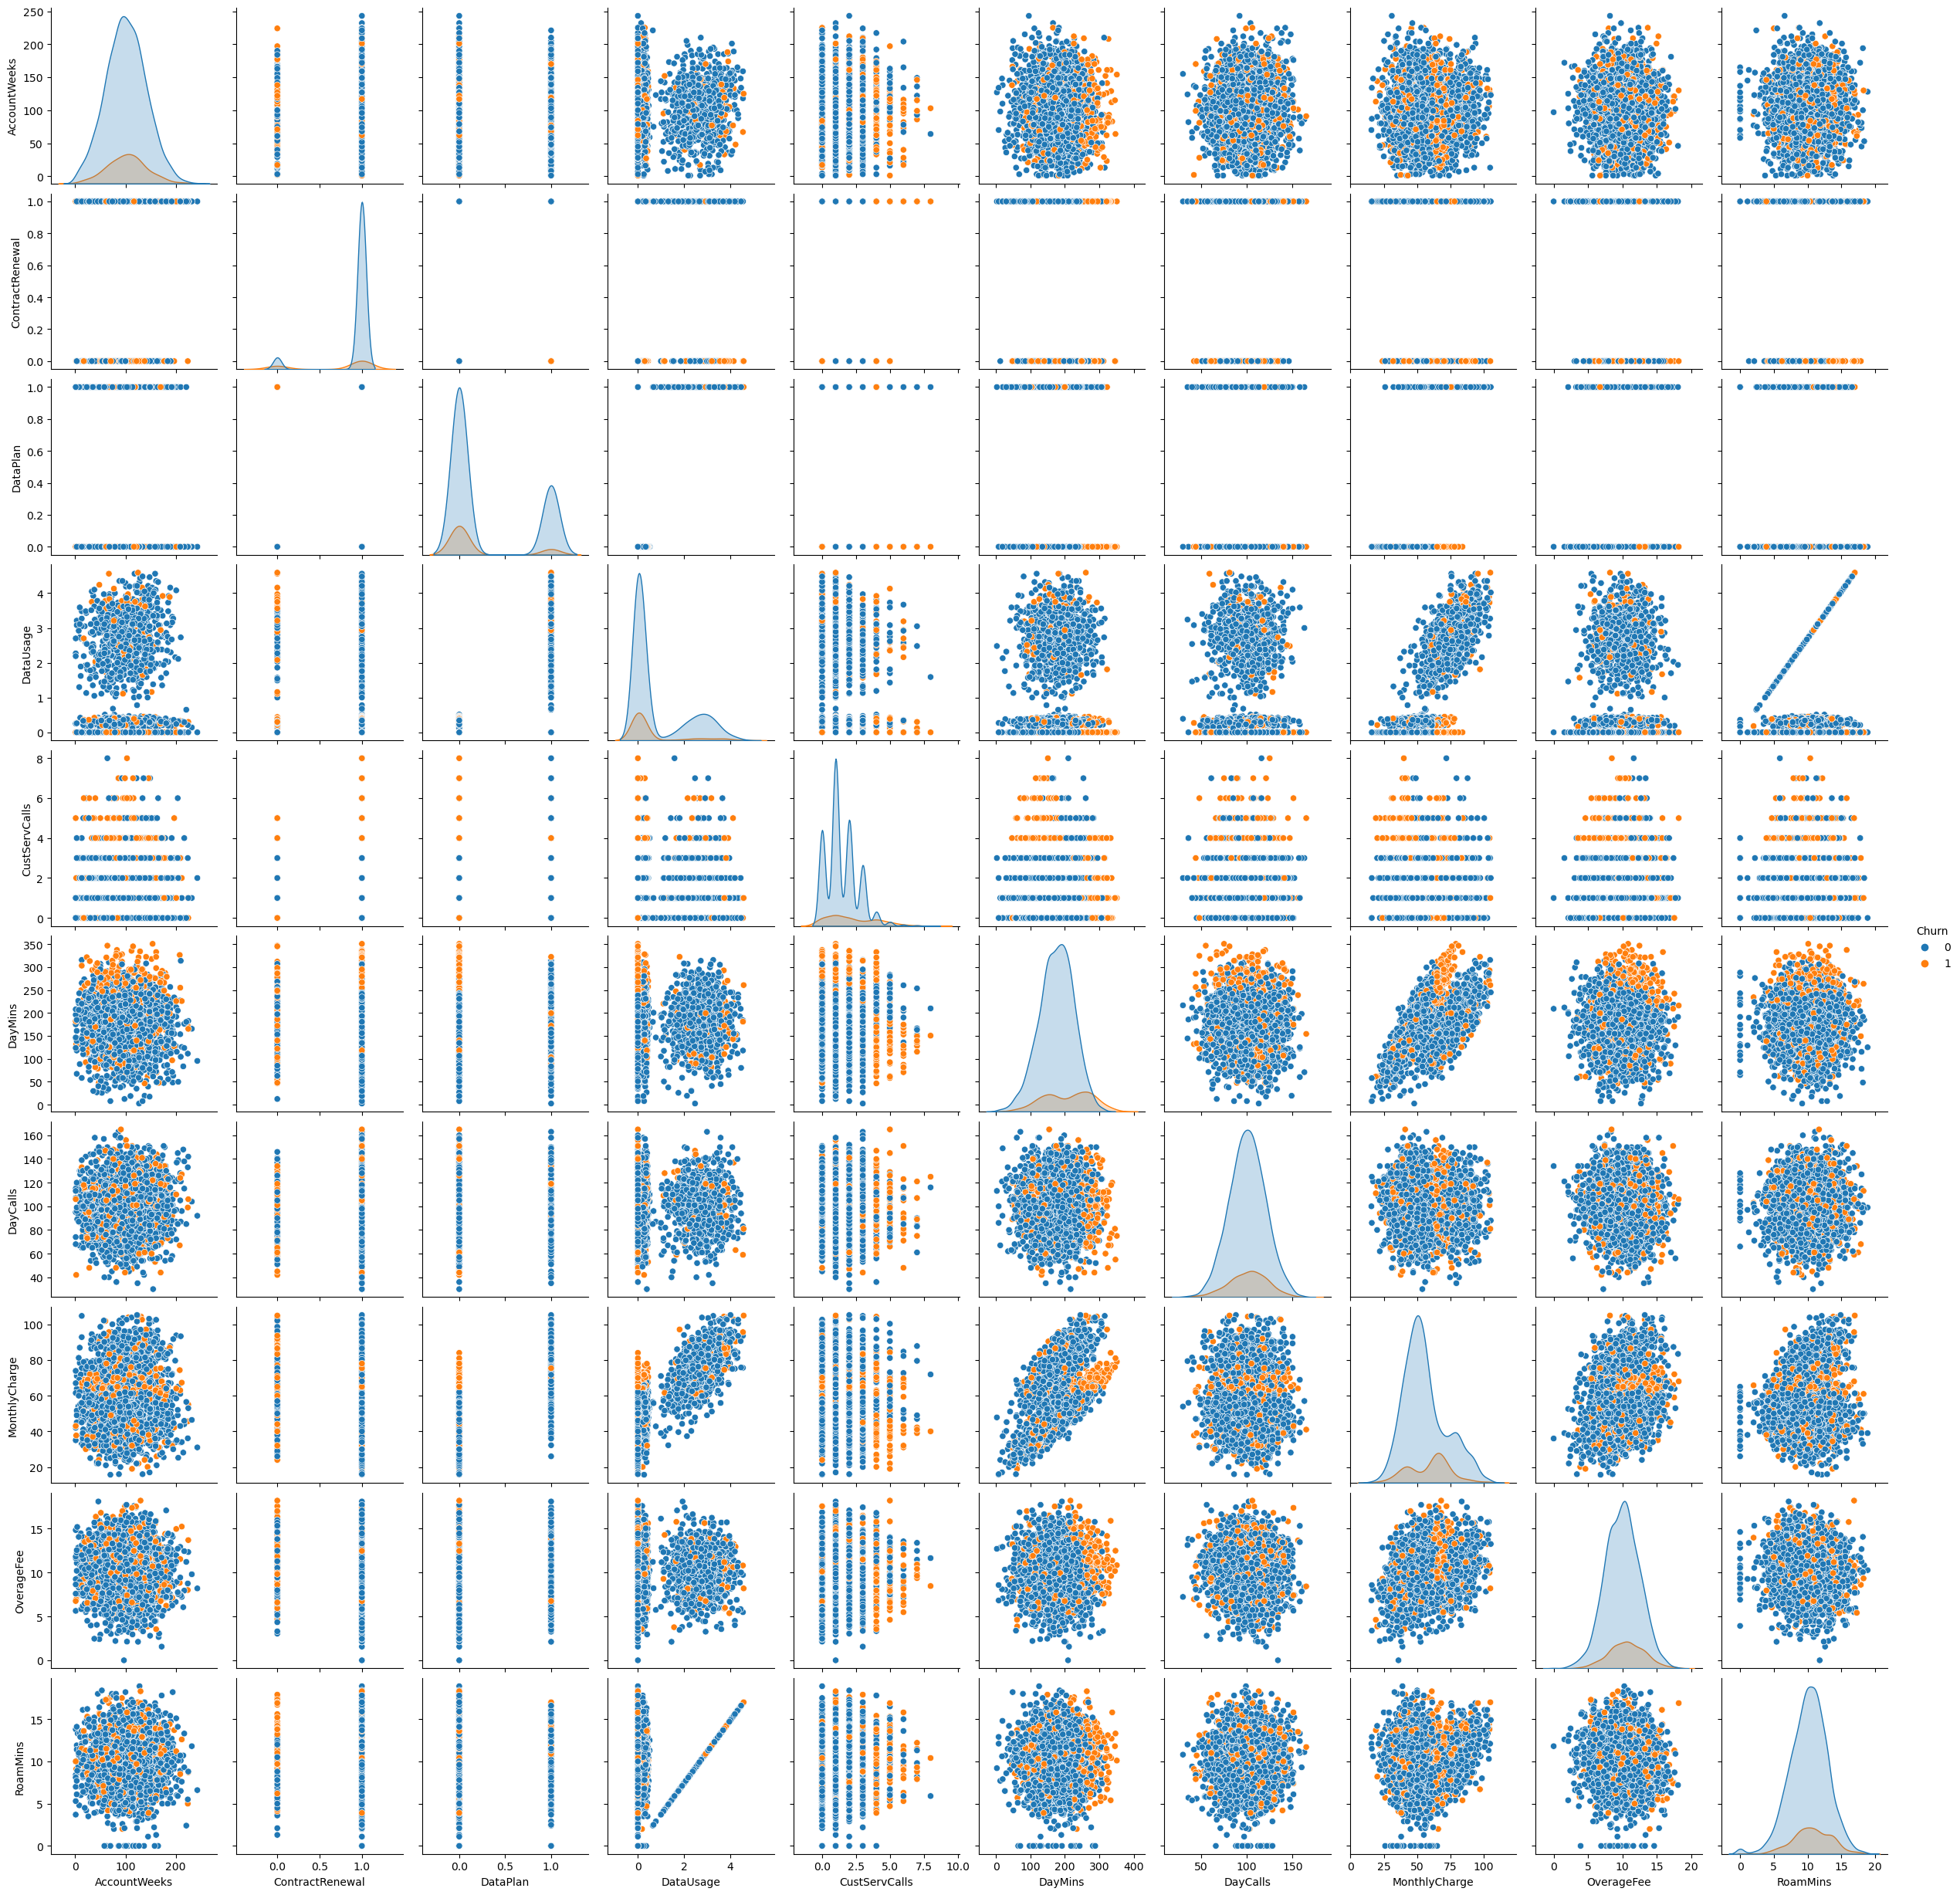

In [834]:
sns.pairplot(df, hue="Churn")

In [835]:
# based on pair plots, we see that if Daymins is higher then churn is higher

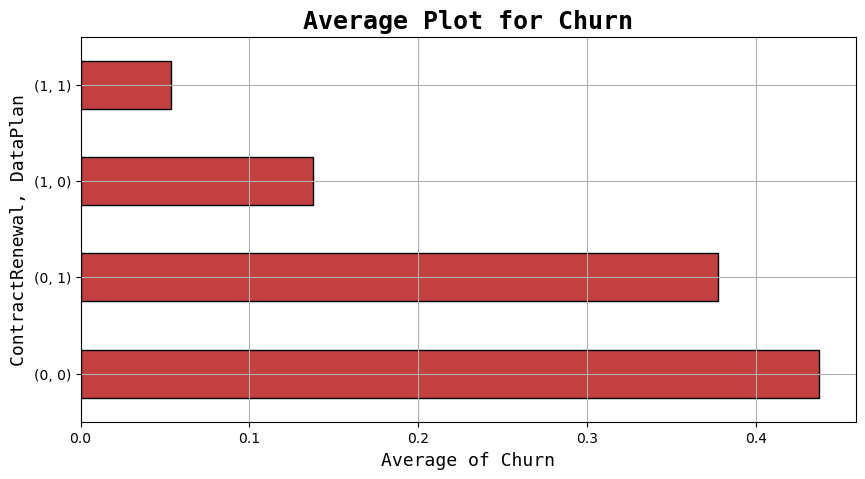

In [836]:
ax = plt.figure(figsize=(10,5))
df.groupby(['ContractRenewal',"DataPlan"])['Churn'].mean().plot(figsize=(10,5),kind="barh",color="#c24040",
                                                               edgecolor='k')
plt.title("Average Plot for Churn" , size=18, fontweight='bold', fontfamily='monospace')
plt.ylabel("ContractRenewal, DataPlan",size=13, fontweight='light', fontfamily='monospace')
plt.xlabel("Average of Churn",size=13, fontweight='light', fontfamily='monospace')
plt.grid(True)
plt.show()

ContractRenewal and DataPlan attributes are two important attributes in customer churn. If these two attributes are "1", the probability of customer churn is low. ContractRenewal's impact is greater than DataPlan.

Increasing DataUsage decreases the probability of churn customer and decreasing other attributes decreases the probability of churn customer. I classified and averaged the Churn attribute to create this chart.

In [837]:
print("Churn:0 and Churn:1")
mean_df = df.mean().reset_index()
mean_df.columns = ['Feature', 'Mean']
mean_df.set_index('Feature')

Churn:0 and Churn:1


Mean
Feature                    
Churn              0.144364
AccountWeeks     101.136227
ContractRenewal    0.903255
DataPlan           0.274262
DataUsage          0.804346
CustServCalls      1.558770
DayMins          179.674382
DayCalls         100.497288
MonthlyCharge     56.156480
OverageFee        10.045437
RoamMins          10.218053

In [838]:
print("Churn:0")
mean_df = df.loc[df["Churn"]==0].mean().reset_index()
mean_df.columns = ['Feature', 'Mean']
mean_df.set_index('Feature')

Churn:0


Mean
Feature                    
Churn              0.000000
AccountWeeks     100.853117
ContractRenewal    0.934484
DataPlan           0.293061
DataUsage          0.850254
CustServCalls      1.450159
DayMins          175.020430
DayCalls         100.327932
MonthlyCharge     55.658225
OverageFee         9.947112
RoamMins          10.139662

In [839]:
print("Churn:1")
mean_df = df.loc[df["Churn"]==1].mean().reset_index()
mean_df.columns = ['Feature', 'Mean']
mean_df.set_index('Feature')

Churn:1


Mean
Feature                    
Churn              1.000000
AccountWeeks     102.814196
ContractRenewal    0.718163
DataPlan           0.162839
DataUsage          0.532255
CustServCalls      2.202505
DayMins          207.258038
DayCalls         101.501044
MonthlyCharge     59.109603
OverageFee        10.628205
RoamMins          10.682672

In [840]:
# selecting some features to calculate their correlation coefficients

df_corr = df[['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins']]
df_corr.corr()

AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
AccountWeeks         1.000000        -0.024644  0.004989   0.018896   
ContractRenewal     -0.024644         1.000000 -0.004484  -0.016559   
DataPlan             0.004989        -0.004484  1.000000   0.947710   
DataUsage            0.018896        -0.016559  0.947710   1.000000   
CustServCalls       -0.004248         0.028437 -0.018384  -0.022466   
DayMins              0.008535        -0.049114 -0.008603  -0.006678   
DayCalls             0.036838        -0.002373 -0.012460  -0.008559   
MonthlyCharge        0.017878        -0.045144  0.736108   0.776444   
OverageFee          -0.005231        -0.017853  0.016223   0.010642   
RoamMins             0.013480        -0.043658 -0.014239   0.143788   

                 CustServCalls   DayMins  DayCalls  MonthlyCharge  OverageFee  \
AccountWeeks         -0.004248  0.008535  0.036838       0.017878   -0.005231   
ContractRenewal       0.028437 -0.049114 -0.002373      -0.045144   -0.017853   
DataPlan             -0.018384 -0.008603 -0.012460       0.736108    0.016223   
DataUsage            -0.022466 -0.006678 -0.008559       0.776444    0.010642   
CustServCalls         1.000000 -0.015362 -0.020278      -0.029470   -0.011458   
DayMins              -0.015362  1.000000 -0.001746       0.565502    0.003754   
DayCalls             -0.020278 -0.001746  1.000000      -0.013552   -0.022220   
MonthlyCharge        -0.029470  0.565502 -0.013552       1.000000    0.277107   
OverageFee           -0.011458  0.003754 -0.022220       0.277107    1.000000   
RoamMins             -0.009329 -0.018485  0.019364       0.096316   -0.018392   

                 RoamMins  
AccountWeeks     0.013480  
ContractRenewal -0.043658  
DataPlan        -0.014239  
DataUsage        0.143788  
CustServCalls   -0.009329  
DayMins         -0.018485  
DayCalls         0.019364  
MonthlyCharge    0.096316  
OverageFee      -0.018392  
RoamMins         1.000000

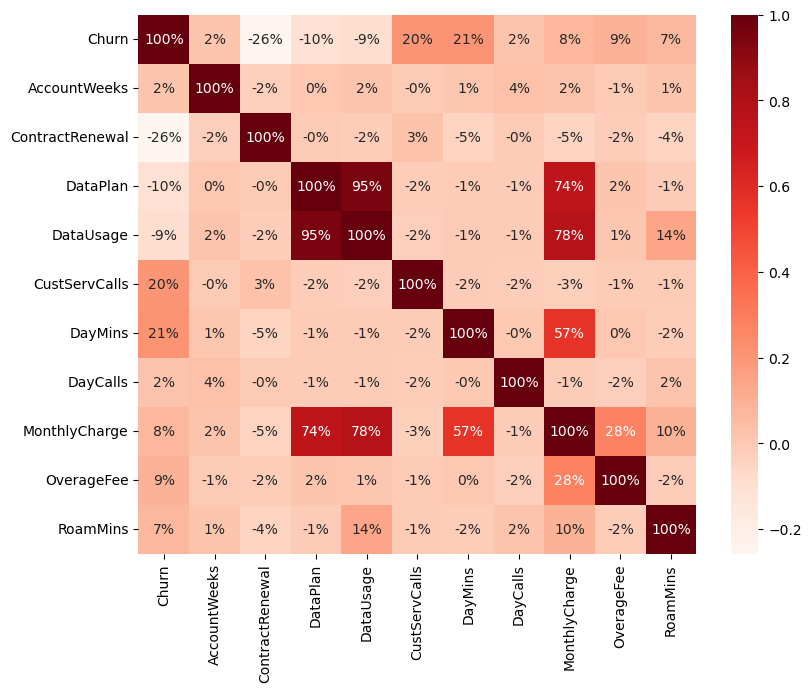

In [841]:
# Heatmap

ax = plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,cmap="Reds", fmt='.0%')
plt.show()

## Logistic Regression

In [842]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [843]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [844]:
# FIT LOGISTIC REGRESSION MODEL
# logistic regression model with all numerical features

X = df[['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins']]
y = df['Churn']

In [845]:
#split the dataset into training (75%) and testing (25%) sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [846]:
log_regression = LogisticRegression()

In [847]:
# fitting model using training data

log_regression.fit(X_train,y_train)

C:\Users\reshm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [848]:
# use model to make predictions on test data

y_pred = log_regression.predict(X_test)

In [849]:
#MODEL DIAGNOSTICS

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.827710843373494


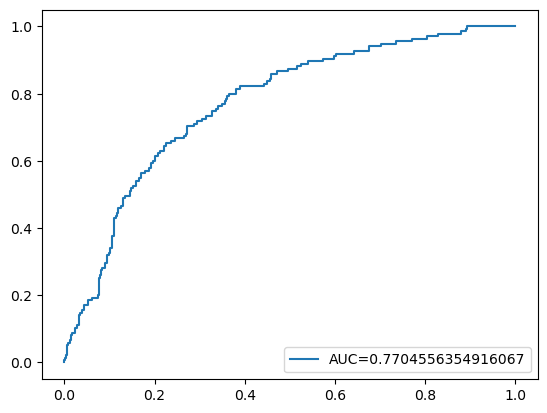

In [850]:
# plot ROC curve

y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [851]:
# Logistic regression with only the features that have most effect on the churn rate

X2 = df[[ 'ContractRenewal', 'DataPlan', 
       'CustServCalls', 'RoamMins']]
y2 = df['Churn']

In [852]:
#split the dataset into training (75%) and testing (25%) sets

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.25, random_state=0)

In [853]:
log_regression2 = LogisticRegression()

In [854]:
# fitting model using training data

log_regression2.fit(X_train2,y_train2)

LogisticRegression()

In [855]:
# use model to make predictions on test data

y_pred2 = log_regression2.predict(X_test2)

In [856]:
#MODEL DIAGNOSTICS

cnf_matrix2 = metrics.confusion_matrix(y_test2, y_pred2)
cnf_matrix2

print("Accuracy:", metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.8301204819277108


In [857]:
# we see a very mild improvement in the accuracy score

In [858]:
# Logistic regression with only the features 'ContractRenewal', 'DataPlan'

X3 = df[[ 'ContractRenewal', 'DataPlan']]
y3 = df['Churn']

#split the dataset into training (75%) and testing (25%) sets

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.25, random_state=0)

log_regression3 = LogisticRegression()

# fitting model using training data

log_regression3.fit(X_train3,y_train3)

# use model to make predictions on test data

y_pred3 = log_regression3.predict(X_test3)
                                  
#MODEL DIAGNOSTICS

cnf_matrix3 = metrics.confusion_matrix(y_test3, y_pred3)
cnf_matrix3

print("Accuracy:", metrics.accuracy_score(y_test3, y_pred3))              

Accuracy: 0.8373493975903614


## Classification

In [859]:
# Train Test split

In [860]:
scaler = StandardScaler().fit(df.drop("Churn",axis=1))

In [861]:
X1 = scaler.transform(df.drop("Churn",axis=1))
y1 = df["Churn"]

In [862]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size =0.25,random_state=0)

In [863]:
# Function for models

In [864]:
# Confusion Matrix

from sklearn.metrics import plot_roc_curve,plot_confusion_matrix,accuracy_score,confusion_matrix
def Model(model):
    global X1, y1, X_train1, X_test1, y_train1, y_test1
    print(type(model).__name__)
    pred = model.predict(X_test1)
    acs = accuracy_score(y_test1, pred)
    print("Accuracy Score             :",acs)
    
    plot_confusion_matrix(model,X1,y1,cmap="Reds")
    plt.title("Confusion Matrix")
    plt.show()

In [865]:
# Cross Validation Score

from sklearn.model_selection import cross_val_score
def CrossValidationScore(model_list):
    global X1,y1
    
    mean_cross_val_score = []
    model_name           = []
    
    for model in model_list:
        model_name.append(type(model).__name__)
        
    for i in model_list:
        scores = cross_val_score(i, X1, y1, cv=5)
        mean_cross_val_score.append(scores.mean())
        
    cvs = pd.DataFrame({"Model Name":model_name,"CVS":mean_cross_val_score})
    return cvs.style.background_gradient("Greens")

In [866]:
def Predict(model,AccountWeeks,
           ContractRenewal,
           DataPlan,
           DataUsage,
           CustServCalls,
           DayMins,
           DayCalls,
           MonthlyCharge,
           OverageFee,
           RoamMins):
    result = model.predict([[AccountWeeks,
           ContractRenewal,
           DataPlan,
           DataUsage,
           CustServCalls,
           DayMins,
           DayCalls,
           MonthlyCharge,
           OverageFee,
           RoamMins]])
    print("Churn:",result[0])

## Models

### KNN

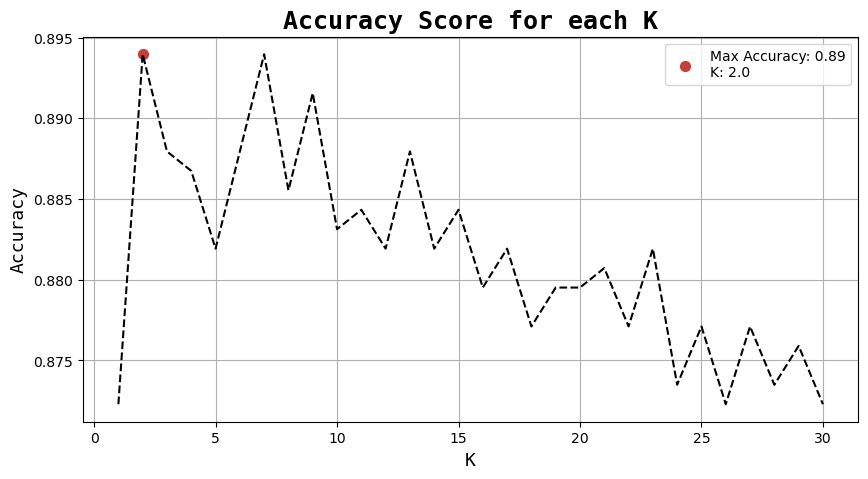

In [867]:
k_max = 30
acc = [[],[]]
for k in range(1, k_max+1):
    mdl = KNeighborsClassifier(n_neighbors=k).fit(X_train1,y_train1)
    pred = mdl.predict(X_test1)
    acc[0].append(k)
    acc[1].append(accuracy_score(y_test1, pred)) 
acc = np.array(acc)
max_acc_k = acc[1].argmax()
plt.figure(figsize=(10,5))
plt.plot(acc[0],acc[1], color='k', ls="--")
plt.scatter(x=acc[0][max_acc_k], y=acc[1][max_acc_k],s=50, label="Max Accuracy: {}\nK: {}".format(round(acc[1][max_acc_k],2),
                                                                                                 acc[0][max_acc_k]), color='#c24040')
plt.legend()
plt.grid(True)
plt.title("Accuracy Score for each K" , size=18, fontweight='bold', fontfamily='monospace')
plt.xlabel("K", size=13, fontweight='light', fontfamily='monospace')
plt.ylabel('Accuracy', size=13, fontweight='light', fontfamily='monospace')
plt.show()

Model Installed!
Please Wait for Results..
KNeighborsClassifier
Accuracy Score             : 0.8819277108433735


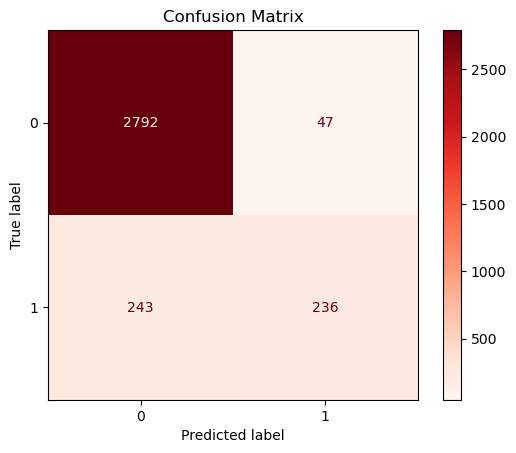

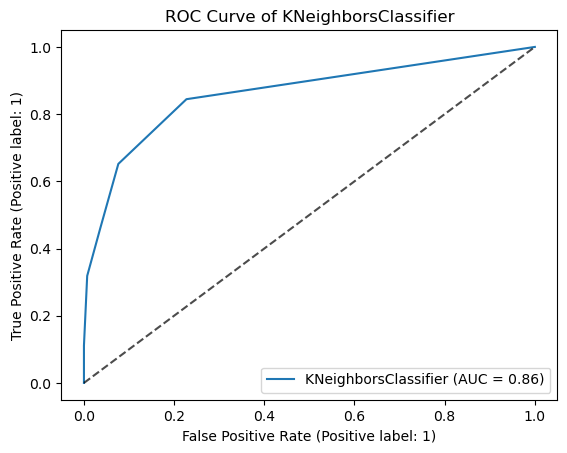

In [868]:
# Confusion Matrix for KNN

knn = KNeighborsClassifier(n_neighbors=5).fit(X_train1,y_train1)
print("Model Installed!")
print("Please Wait for Results..")
Model(knn)

knn_disp = plot_roc_curve(knn, X_test1, y_test1)
plt.title("ROC Curve of {}".format(type(knn).__name__))
plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
plt.show()

### Decision Tree

Model Installed!
Please Wait for Results..
DecisionTreeClassifier
Accuracy Score             : 0.8891566265060241


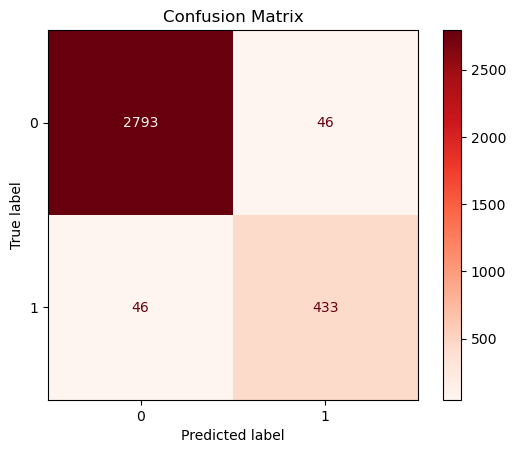

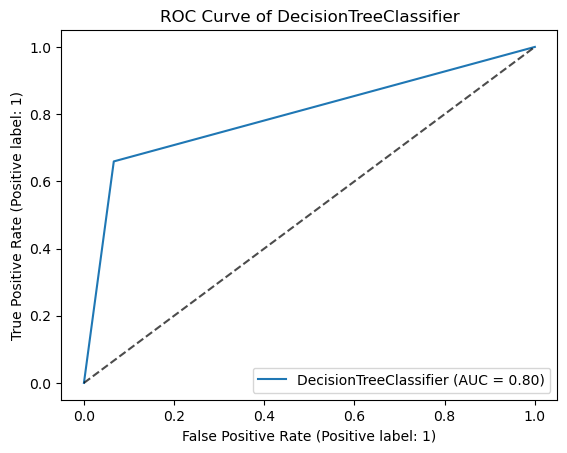

In [869]:
dt = DecisionTreeClassifier().fit(X_train1,y_train1)
print("Model Installed!")
print("Please Wait for Results..")
Model(dt)

dt_disp = plot_roc_curve(dt, X_test1, y_test1)
plt.title("ROC Curve of {}".format(type(dt).__name__))
plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
plt.show()

### Random Forest

Model Installed!
Please Wait for Results..
RandomForestClassifier
Accuracy Score             : 0.9349397590361446


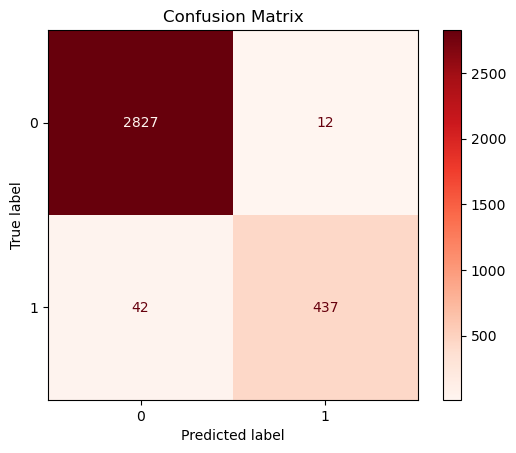

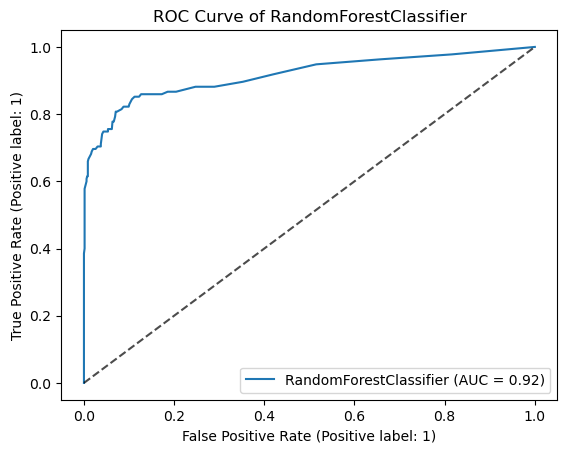

In [870]:
rfc = RandomForestClassifier(n_estimators=100).fit(X_train1,y_train1)
print("Model Installed!")
print("Please Wait for Results..")
Model(rfc)

rfc_disp = plot_roc_curve(rfc, X_test1, y_test1)
plt.title("ROC Curve of {}".format(type(rfc).__name__))
plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
plt.show()

## Result

### Cross Validation Score

In [871]:
model_list = [knn, dt, rfc]
cros_val_df = CrossValidationScore(model_list)
cros_val_df

In [872]:
# Random Forest Classifier is run to classify

Predict(
    model=rfc,
    AccountWeeks=102.6,
    ContractRenewal=0,
    DataPlan=0,
    DataUsage=0,
    CustServCalls=5,
    DayMins=295,
    DayCalls=102,
    MonthlyCharge=60,
    OverageFee=11,
    RoamMins=11,
)

Churn: 1
